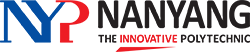

# IT3311 Assignment - Task 2: Image Classification

You are required to build an image classification model to predict the video category based its thumbnail. This analysis aims to be accompaniment to the results of the text classification and the possibilities of using the image classification results together for video category classification.

**Tasks:**

1. **Data Understanding**: Examine the dataset
2. **Data Preparation**: Prepares the data and all necessary preprocessing tasks
3. **Modelling**: Use different text representation and algorithms
4. **Evaluation**: Evaluates results from the algorithms and select the best model

**Done by: Yap Suen Hong (200562J)**

## Import libraries and download the packages

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize
from skimage.feature import hog

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from glob import glob
from matplotlib import pyplot as plt

import seaborn as sns

import random
import cv2

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import random
from keras.layers import Activation
from keras.layers import Dropout
import seaborn as sb
from keras.layers import BatchNormalization
from keras.layers import Reshape

## Read the dataset

In [2]:
# Enter code here
images = []
y = []
ppc = 16
sz = 200
for dir in glob('TRMA Images/*'):
    image_files = glob(dir + '/*.jpg')
    label = dir.split('\\')[-1]
    print(label, len(image_files))

    for image_file in image_files:
        #Image preprocessing step: Resizing
        image = resize(imread(image_file), (sz,sz))
        if len(image.shape) == 2: # if a gray-scale image
            image = gray2rgb(image)
        images.append(image)
        y.append(label)

3Blue1Brown 30
A&E 28
About To Eat 27
Austin Evans 28
BBC News 6
Bon Appetit 30
Brooklyn Nine-Nine 30
BuzzFeedVideo 28
Coder Coder 29
Doctor Who 23
Dr. Becky 26
DRIVETRIBE 19
Eater 19
ElectroBOOM 28
Epicurious 29
Fireship 24
First We Feast 25
FoodTribe 14
Gordon Ramsay 29
Hardware Canucks 29
Hell's Kitchen 30
Incognito Mode 29
Insider News 26
Internet Historian 29
Joma Tech 28
Key & Peele 30
Kurzgesagt ΓÇô In a Nutshell 29
Lex Clips 27
Linus Tech Tips 27
Mark Rober 29
Marques Brownlee 25
MrBeast 29
Munchies 25
Mythical Kitchen 26
NBC News 23
NileRed 29
NowThis News 23
OverSimplified 27
Parks and Recreation 30
PBS Space Time 29
penguinz0 21
Screen Junkies 24
SEA 9
Sky News 23
SmarterEveryDay 22
SomeGoodNews 15
Team Coco 28
TechLinked 27
Techquickie 16
The Daily Show with Trevor Noah 30
The F Word 14
The Graham Norton Show 29
The Grand Tour 25
The Office 30
The Try Guys 30
Top Gear 29
Veritasium 30
VICE 19
Vsauce 20
Web Dev Simplified 27


In [3]:
# dictionary of lists 
dict = {'Channel': y, 'Images': images} 
    
thumbnails_df = pd.DataFrame(dict)
    
thumbnails_df

,Channel,Images
0,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
1,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
2,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
3,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
4,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,..."
...,...,...
1514,Web Dev Simplified,"[[[0.07450980392156863, 0.13725490196078433, 0..."
1515,Web Dev Simplified,"[[[0.07450980392156863, 0.11372549019607844, 0..."
1516,Web Dev Simplified,"[[[0.050980392156862744, 0.08235294117647059, ..."
1517,Web Dev Simplified,"[[[0.2, 0.20392156862745098, 0.184313725490196..."


In [4]:
# Read in food_reviews.csv and display the first 5 lines of the data
videoData_DF = pd.read_csv("videodata.csv", index_col=0)
#Print out data frame
videoData_DF.head()

,Id,Channel,Title,Category,Transcript
1,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
2,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...
5,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so..."
6,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...


## Data Understanding
Perform the necessary steps and explain the rationale taken here.



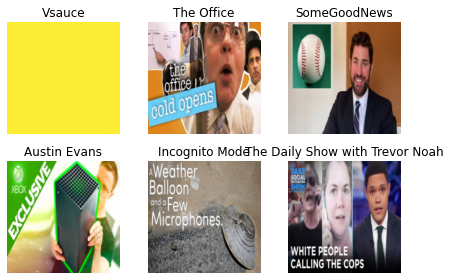

In [5]:
# Enter code here
def display_multiple_img(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title])
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

random_select = thumbnails_df.groupby('Channel').apply(lambda x: x.sample(1)).reset_index(drop=True)
imagesdict={}

for i in range(6):
    # Have a random number so all channels will be included in the random print
    random_num = random.randint(0,59)
    #Putting Images into the dict
    imagesdict[random_select['Channel'][random_num]]= random_select['Images'][random_num]
    

#displaying random images and hog
display_multiple_img(imagesdict, 2,3)

## Data Preparation
Perform the necessary steps and explain the rationale taken here.



#### Image Processing Steps

In [6]:

Image_list = thumbnails_df['Images'].to_numpy()

In [7]:
grayed_list = []
kernel = np.ones((5,5), np.uint8)
for i in range(len(Image_list)):
    #Change to float
    float_img = np.float32(Image_list[i])
    #Gray Scale
    gray_img = cv2.cvtColor(float_img,cv2.COLOR_BGR2GRAY)
    #Blur
    blur_image = cv2.GaussianBlur(gray_img,(5,5),10)
    #Morphological Operations
    img_dilation = cv2.dilate(blur_image, kernel, iterations=1)
    
    grayed_list.append(img_dilation)
    i+=1

In [8]:
gray_img.shape

(200, 200)

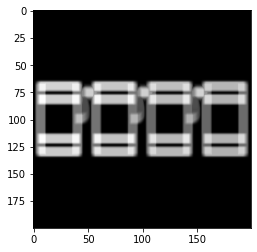

In [9]:
plt.imshow(grayed_list[2], cmap='gray')

In [10]:
thumbnails_df['Processed_images'] = grayed_list

In [11]:
thumbnails_df.head()

,Channel,Images,Processed_images
0,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,3Blue1Brown,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[[0.0, 0.00070408406, 0.0024108416, 0.00503609..."


In [12]:
thumbnails_df['Processed_images'][1].shape

(200, 200)

In [13]:
processed_imagesDF=thumbnails_df.drop(['Images'], axis=1)

In [14]:
processed_imagesDF

,Channel,Processed_images
0,3Blue1Brown,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,3Blue1Brown,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,3Blue1Brown,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3Blue1Brown,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,3Blue1Brown,"[[0.0, 0.00070408406, 0.0024108416, 0.00503609..."
...,...,...
1514,Web Dev Simplified,"[[0.15840213, 0.15840213, 0.15840213, 0.158115..."
1515,Web Dev Simplified,"[[0.13503544, 0.13503544, 0.13503544, 0.134968..."
1516,Web Dev Simplified,"[[0.14631693, 0.1607239, 0.16620871, 0.1668390..."
1517,Web Dev Simplified,"[[0.19761176, 0.19761176, 0.19761176, 0.197611..."


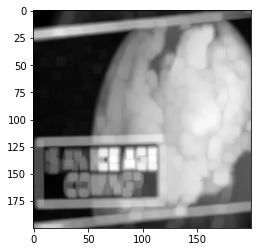

In [15]:
plt.imshow(processed_imagesDF['Processed_images'][1050], cmap='gray')

In [16]:
videoData_DF = videoData_DF[['Channel', 'Category']]
videoData_DF

,Channel,Category
1,Mythical Kitchen,Food
2,Munchies,Food
3,Parks and Recreation,"Entertainment,Comedy"
5,Doctor Who,Entertainment
6,A&E,News
...,...,...
2510,Parks and Recreation,"Entertainment,Comedy"
2511,Hell's Kitchen,Food
2512,Joma Tech,"Tech,Comedy"
2513,jacksepticeye,VideoGames


In [17]:
# Some channel hae 2 category hence I have to split it. 
reshapedVideo_DF = \
(videoData_DF.set_index(videoData_DF.columns.drop('Category',1).tolist())
   .Category.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Category'})
   .loc[:, videoData_DF.columns]
)

reshapedVideo_DF.head()

,Channel,Category
0,Mythical Kitchen,Food
1,Munchies,Food
2,Parks and Recreation,Entertainment
3,Parks and Recreation,Comedy
4,Doctor Who,Entertainment


In [18]:
removeDuplicatesDF = reshapedVideo_DF.drop_duplicates()

In [19]:
removeDuplicatesDF

,Channel,Category
0,Mythical Kitchen,Food
1,Munchies,Food
2,Parks and Recreation,Entertainment
3,Parks and Recreation,Comedy
4,Doctor Who,Entertainment
...,...,...
142,The Office,Comedy
143,The Office,Entertainment
163,Key & Peele,Comedy
178,videogamedunkey,VideoGames


In [20]:
join_DF = pd.merge(processed_imagesDF, removeDuplicatesDF, on='Channel')

In [21]:
join_DF

,Channel,Processed_images,Category
0,A&E,"[[0.64898276, 0.64898276, 0.65383255, 0.675037...",News
1,A&E,"[[0.21263984, 0.21263984, 0.21263984, 0.200826...",News
2,A&E,"[[0.8591725, 0.85919595, 0.85919595, 0.8591959...",News
3,A&E,"[[0.06970904, 0.0894462, 0.11566752, 0.1258979...",News
4,A&E,"[[0.102014445, 0.10507655, 0.11293719, 0.12060...",News
...,...,...,...
1427,Web Dev Simplified,"[[0.15840213, 0.15840213, 0.15840213, 0.158115...",Tech
1428,Web Dev Simplified,"[[0.13503544, 0.13503544, 0.13503544, 0.134968...",Tech
1429,Web Dev Simplified,"[[0.14631693, 0.1607239, 0.16620871, 0.1668390...",Tech
1430,Web Dev Simplified,"[[0.19761176, 0.19761176, 0.19761176, 0.197611...",Tech


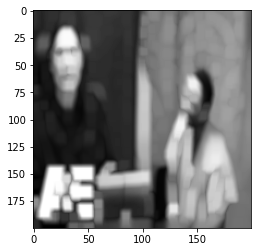

In [22]:
plt.imshow(join_DF['Processed_images'][1], cmap='gray')

In [23]:
join_DF.Category.unique()

array(['News', 'Food', 'Tech', 'Comedy', 'Entertainment'], dtype=object)

In [24]:
len(join_DF)

1432

In [25]:
join_DF['Channel'].value_counts(ascending=False)

Parks and Recreation               60
The Office                         60
Brooklyn Nine-Nine                 60
The Graham Norton Show             58
Joma Tech                          56
Team Coco                          56
TechLinked                         54
First We Feast                     50
Screen Junkies                     48
Hell's Kitchen                     30
Key & Peele                        30
The Try Guys                       30
The Daily Show with Trevor Noah    30
Incognito Mode                     29
Coder Coder                        29
Top Gear                           29
MrBeast                            29
Epicurious                         29
Hardware Canucks                   29
Internet Historian                 29
Gordon Ramsay                      29
Austin Evans                       28
A&E                                28
BuzzFeedVideo                      28
Linus Tech Tips                    27
About To Eat                       27
Web Dev Simp

Because there is only 1432 data which is too less for accurate classification, I have decided to do some data augmentation in order to increase the number of data

In [26]:
for i in range(len(join_DF)):
    image = join_DF['Processed_images'][i]
    height, width = image.shape[:2]
    #Data Augmentation
    # Rotate Image 45 degree
    rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),45,.5)
    rotated_image = cv2.warpAffine(image, rotation_matrix,(width,height))
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [rotated_image], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    # Rotate Image 135 degree
    rotation_matrix3 = cv2.getRotationMatrix2D((width/2,height/2),135,.5)
    rotated_image3 = cv2.warpAffine(image, rotation_matrix3,(width,height))
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [rotated_image3], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    # Rotate Image 225 degree
    rotation_matrix5 = cv2.getRotationMatrix2D((width/2,height/2),225,.5)
    rotated_image5 = cv2.warpAffine(image, rotation_matrix5,(width,height))
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [rotated_image5], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    # Rotate Image 315 degree
    rotation_matrix7 = cv2.getRotationMatrix2D((width/2,height/2),315,.5)
    rotated_image7 = cv2.warpAffine(image, rotation_matrix7,(width,height))
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [rotated_image7], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    #Increase Brightness
    bright = np.ones(image.shape, dtype="float32")*70
    brightincrease = cv2.add(image,bright)
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [brightincrease], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    #Decrease Brightness
    brightdecrease = cv2.subtract(image,bright)
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [brightdecrease], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    #Flipping Image
    flip = cv2.flip(image,3)
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [flip], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    
    #Sharpening Image
    sharpening = np.array([[-1,-1,-1],
                     [-1,10,-1],
                     [-1,-1,-1]])
    sharpened = cv2.filter2D(image,-1,sharpening)
    join_DF = join_DF.append(pd.DataFrame({'Channel': [join_DF['Channel'][i]], 'Processed_images': [sharpened], 'Category':[join_DF['Category'][i]]}), ignore_index =True)
    i+=1
    

In [27]:
len(join_DF)

12888

In [28]:
join_DF

,Channel,Processed_images,Category
0,A&E,"[[0.64898276, 0.64898276, 0.65383255, 0.675037...",News
1,A&E,"[[0.21263984, 0.21263984, 0.21263984, 0.200826...",News
2,A&E,"[[0.8591725, 0.85919595, 0.85919595, 0.8591959...",News
3,A&E,"[[0.06970904, 0.0894462, 0.11566752, 0.1258979...",News
4,A&E,"[[0.102014445, 0.10507655, 0.11293719, 0.12060...",News
...,...,...,...
12883,Web Dev Simplified,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Tech
12884,Web Dev Simplified,"[[70.171844, 70.17286, 70.17385, 70.17464, 70....",Tech
12885,Web Dev Simplified,"[[-69.828156, -69.82714, -69.82615, -69.82536,...",Tech
12886,Web Dev Simplified,"[[0.35595688, 0.35595688, 0.35595688, 0.355649...",Tech


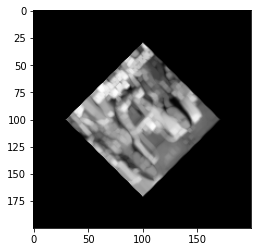

In [29]:
plt.imshow(join_DF['Processed_images'][8562], cmap='gray')

### Feature Extraction

#### Harris Corner Detection

In [30]:
harris_arr = np.asarray(join_DF['Processed_images'])

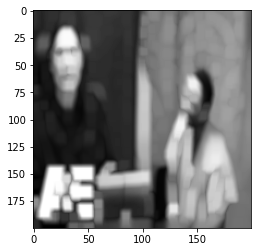

In [31]:
plt.imshow(harris_arr[1], cmap='gray')

In [32]:
len(harris_arr)

12888

In [33]:
harris_list = []
for i in range(len(harris_arr)):
    dst = cv2.cornerHarris(src=harris_arr[i],blockSize=2,ksize=3,k=0.04)
    harris_list.append(dst)
    i+=1

In [34]:
join_DF['harrisFeature'] = harris_list

In [35]:
join_DF

,Channel,Processed_images,Category,harrisFeature
0,A&E,"[[0.64898276, 0.64898276, 0.65383255, 0.675037...",News,"[[-5.5321286e-12, -5.5321286e-12, -4.932974e-0..."
1,A&E,"[[0.21263984, 0.21263984, 0.21263984, 0.200826...",News,"[[0.0, 0.0, -1.9478169e-10, -4.063341e-09, -4...."
2,A&E,"[[0.8591725, 0.85919595, 0.85919595, 0.8591959...",News,"[[-4.21689e-13, -4.21689e-13, -3.7340272e-13, ..."
3,A&E,"[[0.06970904, 0.0894462, 0.11566752, 0.1258979...",News,"[[-4.4613127e-08, -4.4613127e-08, -1.1839894e-..."
4,A&E,"[[0.102014445, 0.10507655, 0.11293719, 0.12060...",News,"[[7.826906e-09, 7.826906e-09, 1.2069185e-08, 1..."
...,...,...,...,...
12883,Web Dev Simplified,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Tech,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
12884,Web Dev Simplified,"[[70.171844, 70.17286, 70.17385, 70.17464, 70....",Tech,"[[-1.6210011e-13, -1.6210011e-13, -5.164149e-1..."
12885,Web Dev Simplified,"[[-69.828156, -69.82714, -69.82615, -69.82536,...",Tech,"[[-1.6210011e-13, -1.6210011e-13, -5.164149e-1..."
12886,Web Dev Simplified,"[[0.35595688, 0.35595688, 0.35595688, 0.355649...",Tech,"[[0.0, 0.0, -8.940926e-17, -4.525031e-15, -4.4..."


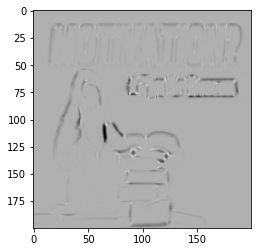

In [36]:
plt.imshow(join_DF['harrisFeature'][200], cmap='gray')

#### Histogram of Oriented Gradients (HOG)

In [37]:
hog_images = []
hog_fd = []
pcc=16
for i in range(len(harris_arr)):
    fd,hog_image = hog(harris_arr[i], orientations=8, pixels_per_cell=(ppc,ppc), 
                       cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_fd.append(fd)
    i+=1

In [38]:
join_DF['hogImages'] = hog_images
join_DF['hogFD'] = hog_fd

In [39]:
join_DF

,Channel,Processed_images,Category,harrisFeature,hogImages,hogFD
0,A&E,"[[0.64898276, 0.64898276, 0.65383255, 0.675037...",News,"[[-5.5321286e-12, -5.5321286e-12, -4.932974e-0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.4654062640446202, 0.013260433258556099, 0.0..."
1,A&E,"[[0.21263984, 0.21263984, 0.21263984, 0.200826...",News,"[[0.0, 0.0, -1.9478169e-10, -4.063341e-09, -4....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.04575130052060237, 0.004299415466491659, 0...."
2,A&E,"[[0.8591725, 0.85919595, 0.85919595, 0.8591959...",News,"[[-4.21689e-13, -4.21689e-13, -3.7340272e-13, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.002233159177671115, 7.479800758530631e-05, ..."
3,A&E,"[[0.06970904, 0.0894462, 0.11566752, 0.1258979...",News,"[[-4.4613127e-08, -4.4613127e-08, -1.1839894e-...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.11985847723518192, 0.0004532493595997275, 0..."
4,A&E,"[[0.102014445, 0.10507655, 0.11293719, 0.12060...",News,"[[7.826906e-09, 7.826906e-09, 1.2069185e-08, 1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.007848622862368579, 0.030404434311023954, 0..."
...,...,...,...,...,...,...
12883,Web Dev Simplified,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",Tech,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
12884,Web Dev Simplified,"[[70.171844, 70.17286, 70.17385, 70.17464, 70....",Tech,"[[-1.6210011e-13, -1.6210011e-13, -5.164149e-1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.015077823206874364, 0.021854558075197393, 0..."
12885,Web Dev Simplified,"[[-69.828156, -69.82714, -69.82615, -69.82536,...",Tech,"[[-1.6210011e-13, -1.6210011e-13, -5.164149e-1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.015077823206874364, 0.021854558075197393, 0..."
12886,Web Dev Simplified,"[[0.35595688, 0.35595688, 0.35595688, 0.355649...",Tech,"[[0.0, 0.0, -8.940926e-17, -4.525031e-15, -4.4...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.007559114456695149, 0.021640747080242762, 0..."


In [40]:
join_DF['hogImages'][1].shape

(200, 200)

In [41]:
join_DF['Channel'].nunique()

47

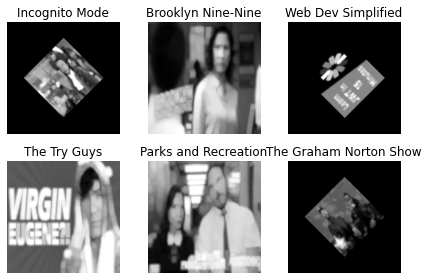

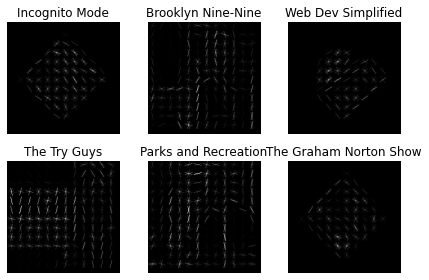

In [43]:
# Enter code here
def display_multiple_img2(images, rows = 1, cols=1):
    figure, ax = plt.subplots(nrows=rows,ncols=cols )
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title], cmap='gray')
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

random_select2 = join_DF.groupby('Channel').apply(lambda x: x.sample(1)).reset_index(drop=True)
imagesdict2={}
hogdict2 = {}

for i in range(6):
    # Have a random number so all channels will be included in the random print
    random_num = random.randint(0,46)
    #Putting Images into the dict
    imagesdict2[random_select2['Channel'][random_num]]= random_select2['Processed_images'][random_num]
    hogdict2[random_select2['Channel'][random_num]]= random_select2['hogImages'][random_num]
    

#displaying random images and hog
display_multiple_img2(imagesdict2, 2,3)
display_multiple_img2(hogdict2, 2,3)

## Modelling
Perform the necessary steps and explain the rationale taken here.


### Classification with HOG Features

In [188]:
hogFD_list = join_DF['hogFD'].to_list()

In [189]:
X1 = np.array(hogFD_list)
y1 = np.array(join_DF['Category'])

# Split the image dataset into training and testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=123)

In [190]:
acc_list = []
cks_list=[]
mcc_list=[]

##### Logistic Regression

In [44]:
# Train a LogisticRegression classifier
clf = LogisticRegression(C=1000, random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train1, y_train1)

C:\Users\Admin\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000, multi_class='multinomial', random_state=0)

In [45]:
# Enter code here

y_pred1 = clf.predict(X_test1)
print("Accuracy: " + str(accuracy_score(y_test1, y_pred1)))
print(classification_report(y_test1, y_pred1))

Accuracy: 0.5100853374709077
               precision    recall  f1-score   support

       Comedy       0.46      0.51      0.48       720
Entertainment       0.40      0.36      0.38       568
         Food       0.55      0.57      0.56       429
         News       0.62      0.55      0.59       380
         Tech       0.60      0.61      0.60       481

     accuracy                           0.51      2578
    macro avg       0.53      0.52      0.52      2578
 weighted avg       0.51      0.51      0.51      2578



In [191]:
lr_acc = accuracy_score(y_test1, y_pred1)
lr_cks = cohen_kappa_score(y_test1, y_pred1)
lr_mcc = matthews_corrcoef(y_test1, y_pred1)

acc_list.append(lr_acc)
cks_list.append(lr_cks)
mcc_list.append(lr_mcc)

##### Support- Vector Classification 

In [46]:
#Create a svm Classifier
SupportVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SupportVM.fit(X_train1, y_train1)

SVC(kernel='linear')

In [47]:
#Predict the response for test dataset
y_pred1_1 = SupportVM.predict(X_test1)
print("Accuracy: " + str(accuracy_score(y_test1, y_pred1_1)))
print(classification_report(y_test1, y_pred1_1))

Accuracy: 0.49844840961986037
               precision    recall  f1-score   support

       Comedy       0.40      0.52      0.45       720
Entertainment       0.32      0.29      0.30       568
         Food       0.65      0.59      0.62       429
         News       0.64      0.54      0.59       380
         Tech       0.66      0.60      0.63       481

     accuracy                           0.50      2578
    macro avg       0.54      0.51      0.52      2578
 weighted avg       0.51      0.50      0.50      2578



In [192]:
svc_acc = accuracy_score(y_test1, y_pred1_1)
svc_cks = cohen_kappa_score(y_test1, y_pred1_1)
svc_mcc = matthews_corrcoef(y_test1, y_pred1_1)

acc_list.append(svc_acc)
cks_list.append(svc_cks)
mcc_list.append(svc_mcc)

##### Decision Tree

In [48]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [49]:
y_pred1_2 = dtc.predict(X_test1)
print("Accuracy: " + str(accuracy_score(y_test1, y_pred1_2)))
print(classification_report(y_test1,y_pred1_2))

Accuracy: 0.3673390224980605
               precision    recall  f1-score   support

       Comedy       0.30      0.37      0.33       720
Entertainment       0.21      0.18      0.19       568
         Food       0.49      0.44      0.46       429
         News       0.46      0.45      0.46       380
         Tech       0.51      0.45      0.48       481

     accuracy                           0.37      2578
    macro avg       0.39      0.38      0.38      2578
 weighted avg       0.37      0.37      0.37      2578



In [193]:
dt_acc = accuracy_score(y_test1, y_pred1_2)
dt_cks = cohen_kappa_score(y_test1, y_pred1_2)
dt_mcc = matthews_corrcoef(y_test1, y_pred1_2)

acc_list.append(dt_acc)
cks_list.append(dt_cks)
mcc_list.append(dt_mcc)

##### Random Forest

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)

RandomForestClassifier()

In [51]:
y_pred1_3 = rfc.predict(X_test1)
print("Accuracy: " + str(accuracy_score(y_test1, y_pred1_3)))
print(classification_report(y_test1,y_pred1_3))

Accuracy: 0.45151280062063615
               precision    recall  f1-score   support

       Comedy       0.34      0.53      0.41       720
Entertainment       0.27      0.21      0.23       568
         Food       0.74      0.51      0.60       429
         News       0.76      0.45      0.56       380
         Tech       0.58      0.58      0.58       481

     accuracy                           0.45      2578
    macro avg       0.53      0.45      0.48      2578
 weighted avg       0.49      0.45      0.46      2578



In [194]:
rf_acc = accuracy_score(y_test1, y_pred1_3)
rf_cks = cohen_kappa_score(y_test1, y_pred1_3)
rf_mcc = matthews_corrcoef(y_test1, y_pred1_3)

acc_list.append(rf_acc)
cks_list.append(rf_cks)
mcc_list.append(rf_mcc)

##### K-Nearest neighbour (KNN)

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train1, y_train1)

KNeighborsClassifier()

In [53]:
y_pred1_4 = knn.predict(X_test1)
print("Accuracy: " + str(accuracy_score(y_test1, y_pred1_4)))
print(classification_report(y_test1,y_pred1_4))

Accuracy: 0.4546159813809154
               precision    recall  f1-score   support

       Comedy       0.40      0.55      0.46       720
Entertainment       0.29      0.35      0.32       568
         Food       0.57      0.46      0.51       429
         News       0.63      0.54      0.58       380
         Tech       0.73      0.37      0.49       481

     accuracy                           0.45      2578
    macro avg       0.52      0.45      0.47      2578
 weighted avg       0.50      0.45      0.46      2578



In [195]:
knn_acc = accuracy_score(y_test1, y_pred1_4)
knn_cks = cohen_kappa_score(y_test1, y_pred1_4)
knn_mcc = matthews_corrcoef(y_test1, y_pred1_4)

acc_list.append(knn_acc)
cks_list.append(knn_cks)
mcc_list.append(knn_mcc)

##### Naive Bayes

In [54]:
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)

GaussianNB()

In [55]:
y_pred1_5 = gnb.predict(X_test1)
print("Accuracy: " + str(accuracy_score(y_test1, y_pred1_5)))
print(classification_report(y_test1,y_pred1_5))

Accuracy: 0.395655546935609
               precision    recall  f1-score   support

       Comedy       0.47      0.29      0.36       720
Entertainment       0.33      0.54      0.41       568
         Food       0.40      0.37      0.38       429
         News       0.35      0.47      0.40       380
         Tech       0.54      0.36      0.44       481

     accuracy                           0.40      2578
    macro avg       0.42      0.40      0.40      2578
 weighted avg       0.42      0.40      0.39      2578



In [196]:
gnb_acc = accuracy_score(y_test1, y_pred1_5)
gnb_cks = cohen_kappa_score(y_test1, y_pred1_5)
gnb_mcc = matthews_corrcoef(y_test1, y_pred1_5)

acc_list.append(gnb_acc)
cks_list.append(gnb_cks)
mcc_list.append(gnb_mcc)

### Classification with Harris Features

In [197]:
harris_list = join_DF['harrisFeature'].to_list()

In [198]:
X2 = np.array(harris_list)
y1 = np.array(join_DF['Category'])


# Split the image dataset into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y1, test_size=0.2, random_state=123)

In [199]:
nsamples, nx, ny = X_train2.shape
d2_X_train2 = X_train2.reshape((nsamples,nx*ny))

nsamples_test, nx_test, ny_test = X_test2.shape
d2_X_test2 = X_test2.reshape((nsamples_test,nx_test*ny_test))

In [221]:
acc_list2 = []
cks_list2=[]
mcc_list2=[]

##### Logistic Regression

In [201]:
# Train a LogisticRegression classifier
clf2 = LogisticRegression(C=1000, random_state=0, solver='lbfgs', multi_class='multinomial')
clf2.fit(d2_X_train2, y_train2)

C:\Users\Admin\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000, multi_class='multinomial', random_state=0)

In [202]:
y_pred2 = clf2.predict(d2_X_test2)

In [204]:
# Enter code here

print("Accuracy: " + str(accuracy_score(y_test2, y_pred2)))
print(classification_report(y_test2, y_pred2))

Accuracy: 0.31070597362296354
               precision    recall  f1-score   support

       Comedy       0.30      0.81      0.44       720
Entertainment       0.26      0.08      0.12       568
         Food       0.37      0.17      0.23       429
         News       0.51      0.10      0.17       380
         Tech       0.31      0.13      0.18       481

     accuracy                           0.31      2578
    macro avg       0.35      0.26      0.23      2578
 weighted avg       0.34      0.31      0.25      2578



In [222]:
lr2_acc = accuracy_score(y_test2, y_pred2)
lr2_cks = cohen_kappa_score(y_test2, y_pred2)
lr2_mcc = matthews_corrcoef(y_test2, y_pred2)

acc_list2.append(lr2_acc)
cks_list2.append(lr2_cks)
mcc_list2.append(lr2_mcc)

##### Support- Vector Classification

In [205]:
#Create a svm Classifier
SupportVM2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SupportVM2.fit(d2_X_train2, y_train2)

SVC(kernel='linear')

In [206]:
#Predict the response for test dataset
y_pred2_1 = SupportVM2.predict(d2_X_test2)
print("Accuracy: " + str(accuracy_score(y_test2, y_pred2_1)))
print(classification_report(y_test2, y_pred2_1))

Accuracy: 0.2878200155159038
               precision    recall  f1-score   support

       Comedy       0.28      0.96      0.44       720
Entertainment       0.15      0.01      0.01       568
         Food       0.70      0.03      0.06       429
         News       0.65      0.03      0.06       380
         Tech       0.36      0.04      0.07       481

     accuracy                           0.29      2578
    macro avg       0.43      0.21      0.13      2578
 weighted avg       0.39      0.29      0.16      2578



In [223]:
svc2_acc = accuracy_score(y_test2, y_pred2_1)
svc2_cks = cohen_kappa_score(y_test2, y_pred2_1)
svc2_mcc = matthews_corrcoef(y_test2, y_pred2_1)

acc_list2.append(svc2_acc)
cks_list2.append(svc2_cks)
mcc_list2.append(svc2_mcc)

##### Decision Tree

In [208]:
dtc2 = DecisionTreeClassifier()
dtc2.fit(d2_X_train2, y_train2)

DecisionTreeClassifier()

In [209]:
set(y_test2) - set(y_pred2_2)

{'Entertainment', 'Food', 'News', 'Tech'}

In [210]:
y_pred2_2 = dtc2.predict(d2_X_test2)
print("Accuracy: " + str(accuracy_score(y_test2, y_pred2_2)))
print(classification_report(y_test2,y_pred2_2))

Accuracy: 0.3975950349107836
               precision    recall  f1-score   support

       Comedy       0.33      0.42      0.37       720
Entertainment       0.22      0.18      0.20       568
         Food       0.57      0.50      0.53       429
         News       0.54      0.54      0.54       380
         Tech       0.45      0.42      0.44       481

     accuracy                           0.40      2578
    macro avg       0.42      0.41      0.42      2578
 weighted avg       0.40      0.40      0.40      2578



In [224]:
dtc2_acc = accuracy_score(y_test2, y_pred2_2)
dtc2_cks = cohen_kappa_score(y_test2, y_pred2_2)
dtc2_mcc = matthews_corrcoef(y_test2, y_pred2_2)

acc_list2.append(dtc2_acc)
cks_list2.append(dtc2_cks)
mcc_list2.append(dtc2_mcc)

#### Ramdom Forest

In [212]:
rfc2 = RandomForestClassifier()
rfc2.fit(d2_X_train2, y_train2)

RandomForestClassifier()

In [213]:
y_pred2_3 = rfc2.predict(d2_X_test2)
print("Accuracy: " + str(accuracy_score(y_test2, y_pred2_3)))
print(classification_report(y_test2,y_pred2_3))

Accuracy: 0.4569433669511249
               precision    recall  f1-score   support

       Comedy       0.34      0.53      0.41       720
Entertainment       0.26      0.20      0.23       568
         Food       0.70      0.55      0.62       429
         News       0.78      0.54      0.64       380
         Tech       0.58      0.51      0.54       481

     accuracy                           0.46      2578
    macro avg       0.53      0.46      0.49      2578
 weighted avg       0.49      0.46      0.46      2578



In [225]:
rfc2_acc = accuracy_score(y_test2, y_pred2_3)
rfc2_cks = cohen_kappa_score(y_test2, y_pred2_3)
rfc2_mcc = matthews_corrcoef(y_test2, y_pred2_3)

acc_list2.append(rfc2_acc)
cks_list2.append(rfc2_cks)
mcc_list2.append(rfc2_mcc)

#### KNN

In [215]:
knn2 = KNeighborsClassifier()
knn2.fit(d2_X_train2, y_train2)

KNeighborsClassifier()

In [216]:
y_pred2_4 = knn2.predict(d2_X_test2)
print("Accuracy: " + str(accuracy_score(y_test2, y_pred2_4)))
print(classification_report(y_test2,y_pred2_4))

Accuracy: 0.3494957331264546
               precision    recall  f1-score   support

       Comedy       0.35      0.48      0.40       720
Entertainment       0.24      0.33      0.28       568
         Food       0.44      0.28      0.34       429
         News       0.50      0.32      0.39       380
         Tech       0.42      0.26      0.32       481

     accuracy                           0.35      2578
    macro avg       0.39      0.33      0.35      2578
 weighted avg       0.38      0.35      0.35      2578



In [226]:
knn2_acc = accuracy_score(y_test2, y_pred2_4)
knn2_cks = cohen_kappa_score(y_test2, y_pred2_4)
knn2_mcc = matthews_corrcoef(y_test2, y_pred2_4)

acc_list2.append(knn2_acc)
cks_list2.append(knn2_cks)
mcc_list2.append(knn2_mcc)

#### Naive Bayes

In [218]:
gnb2 = GaussianNB()
gnb2.fit(d2_X_train2, y_train2)

GaussianNB()

In [219]:
y_pred2_5 = gnb2.predict(d2_X_test2)
print("Accuracy: " + str(accuracy_score(y_test2, y_pred2_5)))
print(classification_report(y_test2,y_pred2_5))

Accuracy: 0.15748642358417378
               precision    recall  f1-score   support

       Comedy       0.24      0.06      0.10       720
Entertainment       0.12      0.01      0.01       568
         Food       0.41      0.04      0.08       429
         News       0.15      0.88      0.25       380
         Tech       0.35      0.01      0.02       481

     accuracy                           0.16      2578
    macro avg       0.25      0.20      0.09      2578
 weighted avg       0.25      0.16      0.08      2578



In [227]:
gnb2_acc = accuracy_score(y_test2, y_pred2_5)
gnb2_cks = cohen_kappa_score(y_test2, y_pred2_5)
gnb2_mcc = matthews_corrcoef(y_test2, y_pred2_5)

acc_list2.append(gnb2_acc)
cks_list2.append(gnb2_cks)
mcc_list2.append(gnb2_mcc)

#### CNN

In [144]:
from keras.models import Sequential
model = Sequential()

In [145]:
#  Convolution + padding

model.add(Conv2D(32, (3, 3), input_shape = (200,200,1), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
model.add(Flatten())

# Full ANN Connection
#model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))

# output activation depends on the number of output classes
model.add(Dense(units = 5, activation = 'softmax'))

In [146]:
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [147]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [148]:
le_y_train2 = le.fit_transform(y_train2)
le_y_test2 = le.fit_transform(y_test2)

In [149]:
from keras.utils.np_utils import to_categorical
new_y_train2 = to_categorical(le_y_train2, num_classes=5)
new_y_test2 = to_categorical(le_y_test2, num_classes=5)

In [152]:
arr4d_X_train2 = np.expand_dims(X_train2, 3)
arr4d_X_test2 = np.expand_dims(X_test2, 3) 

In [153]:
batch_size = 32
m1=model.fit(arr4d_X_train2, new_y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(arr4d_X_test2, new_y_test2),
          shuffle=True)

Epoch 1/50
323/323 [==============================] - 144s 443ms/step - loss: 1.5887 - accuracy: 0.2828 - val_loss: 1.5850 - val_accuracy: 0.2824
Epoch 2/50
323/323 [==============================] - 145s 448ms/step - loss: 1.5751 - accuracy: 0.2934 - val_loss: 1.5908 - val_accuracy: 0.2812
Epoch 3/50
323/323 [==============================] - 144s 446ms/step - loss: 1.5458 - accuracy: 0.3048 - val_loss: 1.5660 - val_accuracy: 0.3037
Epoch 4/50
323/323 [==============================] - 143s 443ms/step - loss: 1.5230 - accuracy: 0.3197 - val_loss: 1.5762 - val_accuracy: 0.2960
Epoch 5/50
323/323 [==============================] - 144s 445ms/step - loss: 1.5051 - accuracy: 0.3232 - val_loss: 1.5836 - val_accuracy: 0.2929
Epoch 6/50
323/323 [==============================] - 146s 453ms/step - loss: 1.4949 - accuracy: 0.3316 - val_loss: 1.6836 - val_accuracy: 0.2944
Epoch 7/50
323/323 [==============================] - 141s 436ms/step - loss: 1.4819 - accuracy: 0.3350 - val_loss: 1.6163 -

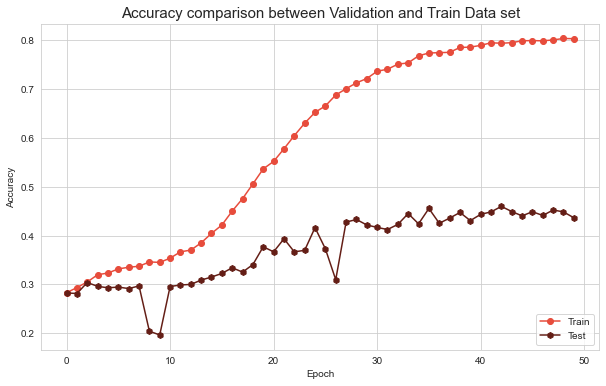

The model is being evaluated
81/81 - 7s - loss: 3.7416 - accuracy: 0.4364 - 7s/epoch - 91ms/step
The accuracy of the model is:
0.43638479709625244


In [179]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m1.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
print("The model is being evaluated")
test_loss1, test_acc1 = model.evaluate(arr4d_X_test2, new_y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc1)

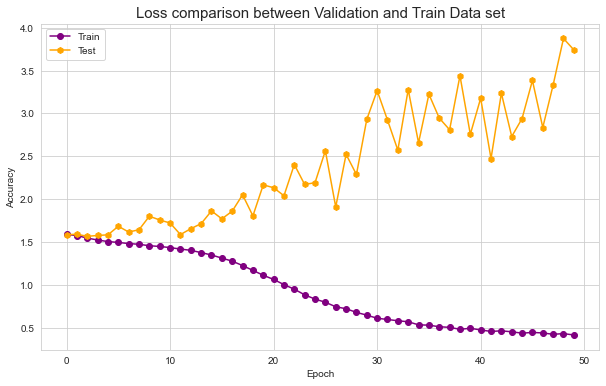

3.741575241088867


In [180]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss1)

You can see that the val_loss was increasing towards the end which shows signs of overfitting as the val_loss increasing, hence I will try adding batchnormalization and dropout layer to prevent the val_loss from increasing. 

In [160]:
model2 = Sequential()

In [161]:
#  Convolution + padding

model2.add(Conv2D(32, (3, 3), input_shape = (200,200,1), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))


model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPool2D(pool_size = (2, 2)))

#Batch Normalization
model2.add(BatchNormalization())
#  Flattening
model2.add(Flatten())


model2.add(Dense(64, activation='relu'))
#Dropout Layer
model2.add(Dropout(0.5))

model2.add(Dense(units = 5, activation = 'softmax'))

In [162]:
model2.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [163]:
batch_size = 32
m2=model2.fit(arr4d_X_train2, new_y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(arr4d_X_test2, new_y_test2),
          shuffle=True)

Epoch 1/50
323/323 [==============================] - 138s 426ms/step - loss: 1.5940 - accuracy: 0.2791 - val_loss: 2.3695 - val_accuracy: 0.2793
Epoch 2/50
323/323 [==============================] - 139s 429ms/step - loss: 1.5766 - accuracy: 0.2895 - val_loss: 9.3565 - val_accuracy: 0.1474
Epoch 3/50
323/323 [==============================] - 139s 429ms/step - loss: 1.5668 - accuracy: 0.2961 - val_loss: 18.3248 - val_accuracy: 0.1478
Epoch 4/50
323/323 [==============================] - 139s 429ms/step - loss: 1.5563 - accuracy: 0.3032 - val_loss: 5.3014 - val_accuracy: 0.2246
Epoch 5/50
323/323 [==============================] - 138s 426ms/step - loss: 1.5422 - accuracy: 0.3110 - val_loss: 6.8803 - val_accuracy: 0.1505
Epoch 6/50
323/323 [==============================] - 138s 427ms/step - loss: 1.5252 - accuracy: 0.3151 - val_loss: 4.1165 - val_accuracy: 0.2793
Epoch 7/50
323/323 [==============================] - 138s 426ms/step - loss: 1.5263 - accuracy: 0.3158 - val_loss: 26.6198

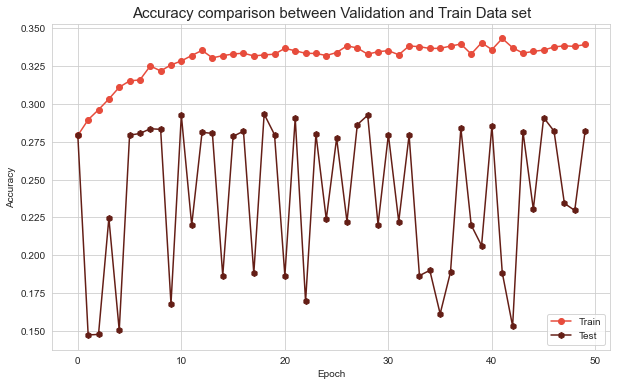

The model is being evaluated
81/81 - 8s - loss: 33.7624 - accuracy: 0.2820 - 8s/epoch - 94ms/step
The accuracy of the model is:
0.2820015549659729


In [177]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
print("The model is being evaluated")
test_loss2, test_acc2 = model2.evaluate(arr4d_X_test2, new_y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc2)

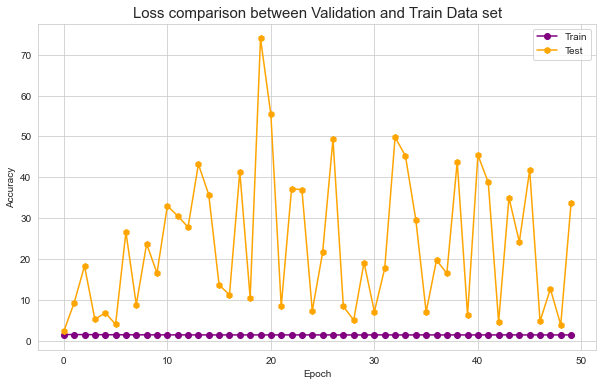

33.76243209838867


In [178]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="Purple",marker='o')
plt.plot(m2.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss2)

Based on the graph, the model way worst, the training accuracy and loss is barely increasing therefore I think that it is not learning hence adding batchnormalization and dropout layer was not the correct method

In [171]:
model4 = Sequential()

In [172]:
#  Convolution + padding

model4.add(Conv2D(32, (3, 3), input_shape = (200,200,1), activation = 'relu'))
model4.add(MaxPool2D(pool_size = (2, 2)))

model4.add(Conv2D(64, (3, 3), activation = 'relu'))
model4.add(MaxPool2D(pool_size = (2, 2)))

model4.add(Conv2D(128, (3, 3), activation = 'relu'))
model4.add(MaxPool2D(pool_size = (2, 2)))

#  Flattening
model4.add(Flatten())

# Full ANN Connection
#model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(128,activation='relu'))
model4.add(Dense(64, activation='relu'))

# output activation depends on the number of output classes
model4.add(Dense(units = 5, activation = 'softmax'))

In [173]:
model4.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [174]:
batch_size = 32
m4=model4.fit(arr4d_X_train2, new_y_train2,
          batch_size=batch_size,
          epochs=50,
          validation_data=(arr4d_X_test2, new_y_test2),
          shuffle=True)

Epoch 1/50
323/323 [==============================] - 147s 455ms/step - loss: 1.5877 - accuracy: 0.2828 - val_loss: 1.5841 - val_accuracy: 0.2824
Epoch 2/50
323/323 [==============================] - 148s 458ms/step - loss: 1.5768 - accuracy: 0.2899 - val_loss: 1.6009 - val_accuracy: 0.2909
Epoch 3/50
323/323 [==============================] - 148s 459ms/step - loss: 1.5541 - accuracy: 0.3076 - val_loss: 1.6509 - val_accuracy: 0.2851
Epoch 4/50
323/323 [==============================] - 149s 460ms/step - loss: 1.5315 - accuracy: 0.3127 - val_loss: 1.5913 - val_accuracy: 0.2952
Epoch 5/50
323/323 [==============================] - 148s 459ms/step - loss: 1.5116 - accuracy: 0.3227 - val_loss: 1.6500 - val_accuracy: 0.2905
Epoch 6/50
323/323 [==============================] - 148s 459ms/step - loss: 1.5026 - accuracy: 0.3253 - val_loss: 1.6075 - val_accuracy: 0.2909
Epoch 7/50
323/323 [==============================] - 148s 459ms/step - loss: 1.4932 - accuracy: 0.3249 - val_loss: 1.7227 -

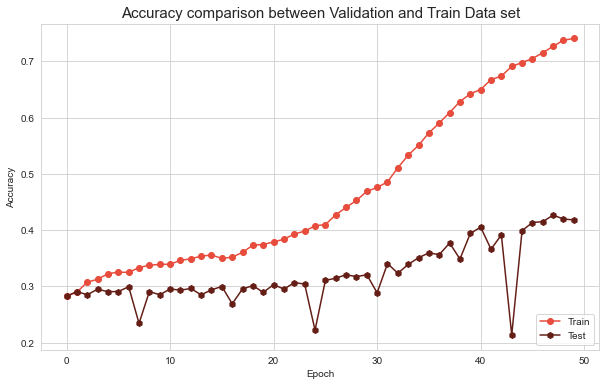

The model is being evaluated
81/81 - 8s - loss: 2.0571 - accuracy: 0.4182 - 8s/epoch - 102ms/step
The accuracy of the model is:
0.4181536138057709


In [175]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m4.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(m4.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()
print("The model is being evaluated")
test_loss4, test_acc4 = model4.evaluate(arr4d_X_test2, new_y_test2, verbose=2)
print("The accuracy of the model is:")
print(test_acc4)

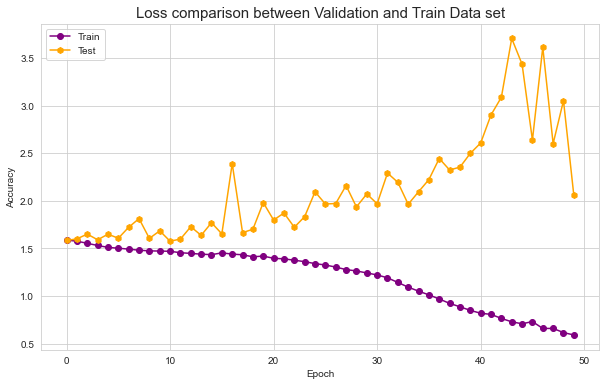

2.057056188583374


In [176]:

plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m4.history['loss'],color="Purple",marker='o')
plt.plot(m4.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(test_loss4)

As you can see from the graph, the val_loss decreased, this means that it is not over fitting. 

## Evaluation
Perform the necessary steps and explain the rationale taken here.



In [105]:
model_list = ['Logistic', 'SVC', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes']

In [106]:
HOG_df = pd.DataFrame(list(zip(model_list,acc_list, cks_list, mcc_list)),
               columns =['Model Name','Accuracy', 'Cohen Kappa Score', 'Matthew Correlation Coefficient'])
HOG_df

,Model Name,Accuracy,Cohen Kappa Score,Matthew Correlation Coefficient
0,Logistic,0.510085,0.377210,0.377611
1,SVC,0.498448,0.358171,0.360090
2,Decision Tree,0.367339,0.192381,0.193199
3,Random Forest,0.451513,0.290124,0.296939
4,KNN,0.454616,0.297593,0.302308
5,Naive Bayes,0.395656,0.241341,0.247196


For Classification with HOG Features Logistic Regression has the highest accuracy of 0.5100853374709077 second highest is Support-Vector Classification of 0.49844840961986037 followed by Random Forest, K-Nearest Neighbour, Naive Bayes, and Decision tree. Accuracy might not be very accurate as it does not take class imbalance into account hence I added another 2 measurement which is Cohen's Kappa Score and Matthew's Correlation Coefficient. I have chosen this 2 other measurement because for Task 1 I've used ROC AUC Score and Log Loss, therefore I have decided to change it up and use different measurement. As you can see, logistic regression got the highest for both measurement which means Logistic Regression is the best model for predicting HOG Features

For Classification with HOG features, the best accuracy model which is logistic regression has the best precision for 'News', recall for 'tech' and f1-score for tech'. For the worst model which is decision tree 'Food' category has the best precision, f1-score and recall. 

In [228]:
harris_df = pd.DataFrame(list(zip(model_list,acc_list2, cks_list2, mcc_list2)),
               columns =['Model Name','Accuracy', 'Cohen Kappa Score', 'Matthew Correlation Coefficient'])
harris_df

,Model Name,Accuracy,Cohen Kappa Score,Matthew Correlation Coefficient
0,Logistic,0.310706,0.073707,0.095442
1,SVC,0.287820,0.017628,0.048676
2,Decision Tree,0.397595,0.231259,0.232244
3,Random Forest,0.456943,0.298335,0.304767
4,KNN,0.349496,0.158856,0.162024
5,Naive Bayes,0.157486,-0.000663,-0.001428


For Classification with Harris Features the order of highest accuracy has changed. It is Random Forest with accuracy of 0.4569433669511249 follwed by CNN with accuracy of 0.4181536138057709, then Decision Tree, KNN, Logistic Regression, Support-Vector Classification and finally Naive Bayes. 

For Classification with Harris Features the best accuracy model which is Random Forest, the best precision is on 'News', the best recall is 'Food' and the best f1-score is 'News'.

Using HOG Features for classification overall gives better accuracy compared to Harris Features. 

#### Improvement

To improve this image classification in terms of accuracy and time spent running the models, I should have reduced the file size when resizing. The size I used for this classification is (200,200) it was taking way too long to do CNN as compared to my AI Tech assignment which used (32,32) file size. I knew that using bigger file size would take a longer time but the time was longer than expected when running the CNN model. I didnt do CNN for HOG features because I used the FD to train my model instead of the image column. 